# 회귀 소개

- 머신러닝 회귀 예측의 핵심: 주어진 피처와 결정값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
- 회귀 유형 구분
    |독립변수 개수|회귀 계수의 결합|
    |-------------|----------------|
    |1개 => 단일회귀| 선형 => 선형회귀|
    |2개 이상 => 다중 회귀| 비선형 => 비선형 회귀|
    
- 선형 회귀 모델
    - 일반 선형 회귀: 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
    - 릿지: 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
    - 라쏘: 선형 회귀에 L1 규제를 추가한 회귀 모델. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게하는 규제 모델
    - 알레스틱넷: L2, L1 규제를 결합한 모델. 피처가 많은 데이터셋에 적용됨.
    - 로지스틱 회귀: 분류에 사용되는 선형 모델. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류(ex. 텍스트 분류)에서 뛰어난 예측 성능을 보임

# 단순 선형 회귀를 통한 회귀 이해

- 단순 선형 회귀: 독립변수 1개, 종속변수 1개
    - $\hat Y = w_0 + w_1X$
- 잔차: $Y - (w_0 + w_1X)$
- 오류 측정 지표
    - MAE(Mean Absolute Error) = $\frac {1}{N} \sum_{i=1}^N |y_i - (w_0 + w_1x_i)|$
    - RSS(Residual Sum Square of Error) = $\frac {1}{N} \sum_{i=1}^N (y_i - (w_0 + w_1x_i))^2$
- 일반적으로 RSS 사용
- RSS = 비용함수 = 손실함수

# 비용 최소화하기 - 경사 하강법 소개

## 경사하강법 구현

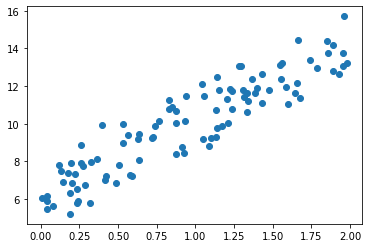

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [3]:
X.shape, y.shape

((100, 1), (100, 1))

In [48]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    
    N = len(y)
    
    #1. w1, w0 0으로 초기화
    #w1_update = np.zeros_like(w1) # 닮고 싶은 크기의 array를 넣는 것
    #w0_update = np.zeros_like(w0)
    
    #2. y예측값과 잔차
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    #3. w0 업데이트를 위한 numpy의 sum(실제값-예측값)을 위한 행렬 생성
    w0_factors = np.ones((N,1))
    
    #4. 업데이트
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update

In [74]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for i in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        print('to update {}:'.format(i+1), w1_update, w0_update)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        print('result {}:'.format(i+1), w1, w0, '\n')
    
    return w1, w0

In [75]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [76]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

to update 1: [[-0.21502681]] [[-0.1994937]]
result 1: [[0.21502681]] [[0.1994937]] 

to update 2: [[-0.20597897]] [[-0.19143729]]
result 2: [[0.42100578]] [[0.39093099]] 

to update 3: [[-0.19730545]] [[-0.18371312]]
result 3: [[0.61831123]] [[0.57464412]] 

to update 4: [[-0.18899078]] [[-0.17630747]]
result 4: [[0.80730201]] [[0.75095159]] 

to update 5: [[-0.18102015]] [[-0.16920717]]
result 5: [[0.98832217]] [[0.92015876]] 

to update 6: [[-0.17337933]] [[-0.16239962]]
result 6: [[1.1617015]] [[1.08255838]] 

to update 7: [[-0.16605471]] [[-0.15587272]]
result 7: [[1.32775621]] [[1.2384311]] 

to update 8: [[-0.1590332]] [[-0.14961488]]
result 8: [[1.48678941]] [[1.38804598]] 

to update 9: [[-0.15230229]] [[-0.14361499]]
result 9: [[1.6390917]] [[1.53166097]] 

to update 10: [[-0.14584998]] [[-0.13786238]]
result 10: [[1.78494168]] [[1.66952335]] 

to update 11: [[-0.13966475]] [[-0.13234686]]
result 11: [[1.92460643]] [[1.80187021]] 

to update 12: [[-0.13373556]] [[-0.12705861]]

to update 225: [[0.00207897]] [[-0.00237769]]
result 225: [[4.61716333]] [[5.49027975]] 

to update 226: [[0.00207293]] [[-0.00236945]]
result 226: [[4.6150904]] [[5.4926492]] 

to update 227: [[0.00206689]] [[-0.00236126]]
result 227: [[4.61302351]] [[5.49501047]] 

to update 228: [[0.00206084]] [[-0.00235313]]
result 228: [[4.61096267]] [[5.49736359]] 

to update 229: [[0.00205478]] [[-0.00234504]]
result 229: [[4.60890789]] [[5.49970863]] 

to update 230: [[0.00204872]] [[-0.002337]]
result 230: [[4.60685917]] [[5.50204563]] 

to update 231: [[0.00204266]] [[-0.002329]]
result 231: [[4.60481651]] [[5.50437463]] 

to update 232: [[0.0020366]] [[-0.00232105]]
result 232: [[4.60277991]] [[5.50669569]] 

to update 233: [[0.00203053]] [[-0.00231315]]
result 233: [[4.60074938]] [[5.50900884]] 

to update 234: [[0.00202446]] [[-0.00230529]]
result 234: [[4.59872492]] [[5.51131412]] 

to update 235: [[0.00201839]] [[-0.00229747]]
result 235: [[4.59670653]] [[5.51361159]] 

to update 236: [[

result 504: [[4.23248627]] [[5.92460805]] 

to update 505: [[0.00084989]] [[-0.0009578]]
result 505: [[4.23163639]] [[5.92556586]] 

to update 506: [[0.00084715]] [[-0.00095472]]
result 506: [[4.23078924]] [[5.92652057]] 

to update 507: [[0.00084442]] [[-0.00095165]]
result 507: [[4.22994481]] [[5.92747222]] 

to update 508: [[0.00084171]] [[-0.00094858]]
result 508: [[4.22910311]] [[5.9284208]] 

to update 509: [[0.000839]] [[-0.00094553]]
result 509: [[4.22826411]] [[5.92936633]] 

to update 510: [[0.0008363]] [[-0.00094249]]
result 510: [[4.22742782]] [[5.93030882]] 

to update 511: [[0.0008336]] [[-0.00093945]]
result 511: [[4.22659421]] [[5.93124827]] 

to update 512: [[0.00083092]] [[-0.00093643]]
result 512: [[4.22576329]] [[5.9321847]] 

to update 513: [[0.00082825]] [[-0.00093341]]
result 513: [[4.22493505]] [[5.93311811]] 

to update 514: [[0.00082558]] [[-0.00093041]]
result 514: [[4.22410947]] [[5.93404852]] 

to update 515: [[0.00082292]] [[-0.00092741]]
result 515: [[4.2

to update 760: [[0.0003735]] [[-0.00042093]]
result 760: [[4.08412313]] [[6.09180988]] 

to update 761: [[0.0003723]] [[-0.00041957]]
result 761: [[4.08375083]] [[6.09222945]] 

to update 762: [[0.0003711]] [[-0.00041822]]
result 762: [[4.08337973]] [[6.09264767]] 

to update 763: [[0.00036991]] [[-0.00041688]]
result 763: [[4.08300982]] [[6.09306455]] 

to update 764: [[0.00036872]] [[-0.00041553]]
result 764: [[4.08264111]] [[6.09348009]] 

to update 765: [[0.00036753]] [[-0.0004142]]
result 765: [[4.08227358]] [[6.09389428]] 

to update 766: [[0.00036635]] [[-0.00041286]]
result 766: [[4.08190723]] [[6.09430715]] 

to update 767: [[0.00036517]] [[-0.00041153]]
result 767: [[4.08154206]] [[6.09471868]] 

to update 768: [[0.00036399]] [[-0.00041021]]
result 768: [[4.08117807]] [[6.09512889]] 

to update 769: [[0.00036282]] [[-0.00040889]]
result 769: [[4.08081525]] [[6.09553778]] 

to update 770: [[0.00036165]] [[-0.00040757]]
result 770: [[4.0804536]] [[6.09594535]] 

to update 771: 

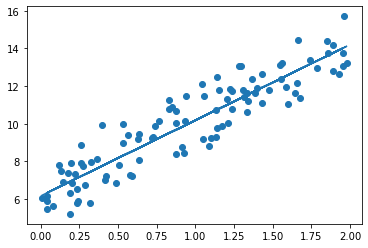

In [77]:
plt.scatter(X, y)
plt.plot(X,y_pred)

## (미니 배치) 확률적 경사 하강법

- 일반적인 경사하강법은 모든 학습 데이터에 대해 비용함수를 계산하기 때문에 오래걸림
- 대체적으로 확률적 경사 하강법(Stochastic Gradient Descent)을 이용함
- 확률적 경사 하강법: 일부 데이터만 이용하여 비용함수 계산
- 미니 배치 확률적 경사 하강법

In [78]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [79]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


결과에 큰 차이 없음. 예측 오류도 비슷함.

# 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

<Linear Regression 클래스>
 - 입력 파라미터
     - fit_intercept: True면 y절편 사용
     - normalize: True면 회귀를 수행하기 전 입력 데이터셋을 정규화
 - 속성
     - coef_: 회귀계수
     - intercept_

<회귀 평가 지표>
- MAE
- MSE
- RSME
- R2

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


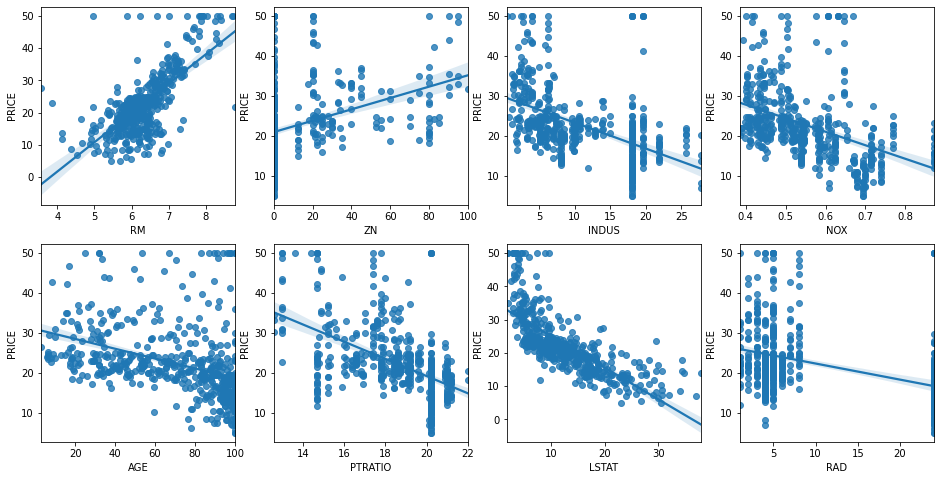

In [81]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [83]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164585
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [84]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [85]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


# 다항 회귀와 과대적합/과소적합 이해

- 다항회귀: 독립변수가 여러개인 선형회귀
    - 선형/비선형: 회귀 계수가 선형/비선형인지에 따른 것 (독립변수의 선형/비선형 여부와는 무관) <https://brunch.co.kr/@gimmesilver/18>

## 다항 회귀 이해

### PolynomialFeatures 클래스 이해

변환: [$1,x_1,x_2,x_1^2,x_1x_2,x_2^2$]

In [93]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)
print(poly_ftr.shape)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]
(2, 6)


### 3차 다항 계수

In [96]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 # X변수 2개
    return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature: \n' ,X)

y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [89]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


### 3차 다항 회귀 - 사이킷런 파이프라인

In [102]:
 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

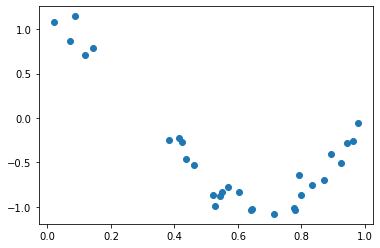

In [104]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716240e+07
 -1.44873341e+08  7.09315840e+08 -2.47066022e+09  6.24561781e+09
 -1.15676672e+10  1.56895187e+10 -1.54006300e+10  1.06457475e+10
 -4.91378589e+09  1.35919961e+09 -1.70381209e+08] 입니다.
Degree 15 MSE 는 182594790.08 입니다.


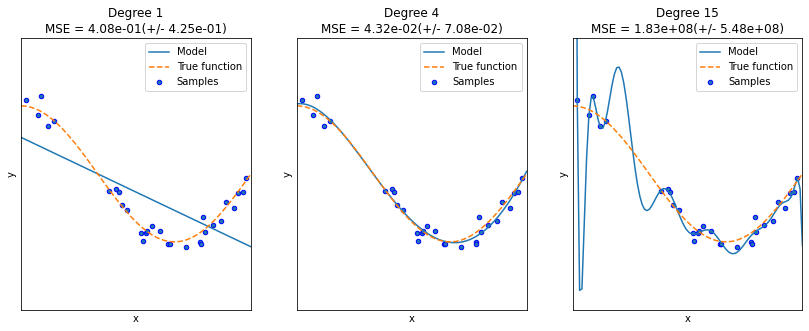

In [105]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

## 편향-분산 트레이드오프

- degree 1 => 지나치게 한 방향으로 치우침 => 고편향
- degree 15 => 지나치게 높은 변동성 => 고분산